In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug  2 05:30:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import signal

In [ ]:
X_train=np.load("./drive/MyDrive/MSc Thesis/Experiments/all_pairs_ts_data_X_trainv7_exp2_exp5.npy")
y_train=np.load("./drive/MyDrive/MSc Thesis/Experiments/all_pairs_ts_data_y_trainv7_exp2_exp5.npy").astype(int)

X_test=np.load("./drive/MyDrive/MSc Thesis/Experiments/all_pairs_ts_data_X_testv7_exp2_exp5.npy")
y_test=np.load("./drive/MyDrive/MSc Thesis/Experiments/all_pairs_ts_data_y_testv7_exp2_exp5.npy").astype(int)


In [ ]:
def calc_freq_signal(arr):
    freqs, psd = signal.welch(arr, fs=10)
    return psd

X_train_f=np.apply_along_axis(calc_freq_signal, 1, X_train)
X_test_f=np.apply_along_axis(calc_freq_signal, 1, X_test)


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  .format(nperseg, input_length))


In [ ]:
X_train_1d=np.gradient(X_train,axis=1)
X_test_1d=np.gradient(X_test,axis=1)
X_train=np.dstack([X_train,X_train_1d])
X_test=np.dstack([X_test,X_test_1d])

In [ ]:
def custom_scaler(X, range=(0, 1),min=None,max=None):
    mi, ma = range
    if(min==None):
      min=X.min()
      max=X.max()
      print("\nTrain_Scaling:- min=",min," max=",max)
    X_std = (X - min) / (max - min)
    X_scaled = X_std * (ma - mi) + mi
    return min,max,X_scaled

In [ ]:
# Feature Scaling
#X_train contains 8 signals x1,x2,y1,y2,x1d,2d,y1d,y2d
X_train_scaled=copy.copy(X_train)
X_test_scaled=copy.copy(X_test)

min_temp,max_temp,X_train_scaled[:,:,0:2]=custom_scaler(X_train_scaled[:,:,0:2],range=(0,1))
_,_,X_test_scaled[:,:,0:2]=custom_scaler(X_test_scaled[:,:,0:2],range=(0,1),min=min_temp,max=max_temp)

min_temp,max_temp,X_train_scaled[:,:,2:4]=custom_scaler(X_train_scaled[:,:,2:4],range=(0,1))
_,_,X_test_scaled[:,:,2:4]=custom_scaler(X_test_scaled[:,:,2:4],range=(0,1),min=min_temp,max=max_temp)

min_temp,max_temp,X_train_scaled[:,:,4:6]=custom_scaler(X_train_scaled[:,:,4:6],range=(0,1))
_,_,X_test_scaled[:,:,4:6]=custom_scaler(X_test_scaled[:,:,4:6],range=(0,1),min=min_temp,max=max_temp)

min_temp,max_temp,X_train_scaled[:,:,6:8]=custom_scaler(X_train_scaled[:,:,6:8],range=(0,1))
_,_,X_test_scaled[:,:,6:8]=custom_scaler(X_test_scaled[:,:,6:8],range=(0,1),min=min_temp,max=max_temp)


print("Frequency signals scaling:-------------")
#X_train contains 8 signals x1f,x2f,y1f,y2f
X_train_scaled_f=copy.copy(X_train_f)
X_test_scaled_f=copy.copy(X_test_f)

min_temp,max_temp,X_train_scaled_f[:,:,0:2]=custom_scaler(X_train_scaled_f[:,:,0:2],range=(0,1))
_,_,X_test_scaled_f[:,:,0:2]=custom_scaler(X_test_scaled_f[:,:,0:2],range=(0,1),min=min_temp,max=max_temp)

min_temp,max_temp,X_train_scaled_f[:,:,2:4]=custom_scaler(X_train_scaled_f[:,:,2:4],range=(0,1))
_,_,X_test_scaled_f[:,:,2:4]=custom_scaler(X_test_scaled_f[:,:,2:4],range=(0,1),min=min_temp,max=max_temp)



Train_Scaling:- min= -24.132592179310038  max= 28.36396103067893

Train_Scaling:- min= -31.27613373276081  max= 33.197802245887985

Train_Scaling:- min= -11.72770325673539  max= 13.779106439601684

Train_Scaling:- min= -19.048373985970322  max= 18.311546903226954
Frequency signals scaling:-------------

Train_Scaling:- min= 0.0  max= 423.0426963359623

Train_Scaling:- min= 0.0  max= 988.3390100809438


In [ ]:
print(X_train_scaled.shape)
print(X_train_scaled_f.shape)

print(X_test_scaled.shape)
print(X_test_scaled_f.shape)

(18424, 50, 8)
(18424, 26, 4)
(5773, 50, 8)
(5773, 26, 4)


In [ ]:
dataset_train=pd.DataFrame(y_train)
dataset_train['node1']=list(X_train_scaled[:,:,[0,2,4,6]])
dataset_train['node2']=list(X_train_scaled[:,:,[1,3,5,7]])

dataset_test=pd.DataFrame(y_test)
dataset_test['node1']=list(X_test_scaled[:,:,[0,2,4,6]])
dataset_test['node2']=list(X_test_scaled[:,:,[1,3,5,7]])

dataset_train_f=pd.DataFrame(y_train)
dataset_train_f['node1']=list(X_train_scaled_f[:,:,[0,2]])
dataset_train_f['node2']=list(X_train_scaled_f[:,:,[1,3]])

dataset_test_f=pd.DataFrame(y_test)
dataset_test_f['node1']=list(X_test_scaled_f[:,:,[0,2]])
dataset_test_f['node2']=list(X_test_scaled_f[:,:,[1,3]])

In [ ]:
#Adding Local infos
padding_dim=20
padding_val=1e6 ### all other values will be between 0 and 1s, only those which we want to mask will be 1e6
def mask_pair(arr,local_features):
  temp=copy.copy(local_features)
  temp[[arr[2],arr[3]],:,:]=padding_val
  return(temp)

def add_local_info(df):
  df=df.reset_index(drop=True)
  node_features=pd.concat([df['node1'],df['node2'][len(df)-1:]],axis=0).reset_index(drop=True)
  node_features=node_features[node_features.astype(str).drop_duplicates().index].reset_index(drop=True)
  node_features=np.stack(node_features)
  node_features=np.pad(node_features, [(0,padding_dim-node_features.shape[0]),(0,0),(0,0)], 'constant', constant_values=padding_val)
  df['local_info']=df.apply(lambda row: mask_pair(row,node_features), axis=1)
  return(df)

In [ ]:
dataset_train1=dataset_train.groupby(1).apply(add_local_info).reset_index(drop=True)
dataset_test1=dataset_test.groupby(1).apply(add_local_info).reset_index(drop=True)
dataset_train_f1=dataset_train_f.groupby(1).apply(add_local_info).reset_index(drop=True)
dataset_test_f1=dataset_test_f.groupby(1).apply(add_local_info).reset_index(drop=True)

In [ ]:
X_train_scaled_local=np.stack(dataset_train1['local_info'])
X_test_scaled_local=np.stack(dataset_test1['local_info'])
X_train_scaled_f_local=np.stack(dataset_train_f1['local_info'])
X_test_scaled_f_local=np.stack(dataset_test_f1['local_info'])

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled_f.shape)
print(X_test_scaled_f.shape)

print(X_train_scaled_local.shape)
print(X_test_scaled_local.shape)
print(X_train_scaled_f_local.shape)
print(X_test_scaled_f_local.shape)

(18424, 50, 8)
(5773, 50, 8)
(18424, 26, 4)
(5773, 26, 4)
(18424, 20, 50, 4)
(5773, 20, 50, 4)
(18424, 20, 26, 2)
(5773, 20, 26, 2)


In [ ]:

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from tensorflow.keras import layers
import keras

input_1 = Input((X_train_scaled.shape[1], X_train_scaled.shape[2])) #50,8
input_2 = Input((X_train_scaled_f.shape[1], X_train_scaled_f.shape[2])) #26,4

input_3 = Input((X_train_scaled_local.shape[1], X_train_scaled_local.shape[2], X_train_scaled_local.shape[3])) #20,50,4
input_4 = Input((X_train_scaled_f_local.shape[1], X_train_scaled_f_local.shape[2], X_train_scaled_f_local.shape[3])) #20,26,2


x1=LSTM(units = 100, return_sequences = True)(input_1)
x1=LSTM(units = 50)(x1)

x2=LSTM(units = 100, return_sequences = True)(input_2)
x2=LSTM(units = 50)(x2)

x3=layers.Masking(mask_value=padding_val)(input_3)
x3=layers.TimeDistributed(LSTM(units = 100, return_sequences = True))(x3)
x3=layers.TimeDistributed(LSTM(units = 50))(x3)
# x3=layers.TimeDistributed(Dense(units = 1))(x3)
x3=layers.Flatten()(x3)

x4=layers.Masking(mask_value=padding_val)(input_4)
x4=layers.TimeDistributed(LSTM(units = 100, return_sequences = True))(x4)
x4=layers.TimeDistributed(LSTM(units = 50))(x4)
# x4=layers.TimeDistributed(Dense(units = 1))(x4)
x4=layers.Flatten()(x4)

x_neighbbours=layers.concatenate([x3,x4])
x_neighbbours=layers.Dense(100)(x_neighbbours)

x = layers.concatenate([x1, x2,x_neighbbours])
x=layers.Dense(50)(x)

output_layer = layers.Dense(1, activation="sigmoid")(x)

classifier=keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=output_layer)

# Compiling the RNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20, 50, 4)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 20, 26, 2)]  0           []                               
                                                                                                  
 masking (Masking)              (None, 20, 50, 4)    0           ['input_3[0][0]']                
                                                                                                  
 masking_1 (Masking)            (None, 20, 26, 2)    0           ['input_4[0][0]']                
                                                                                              

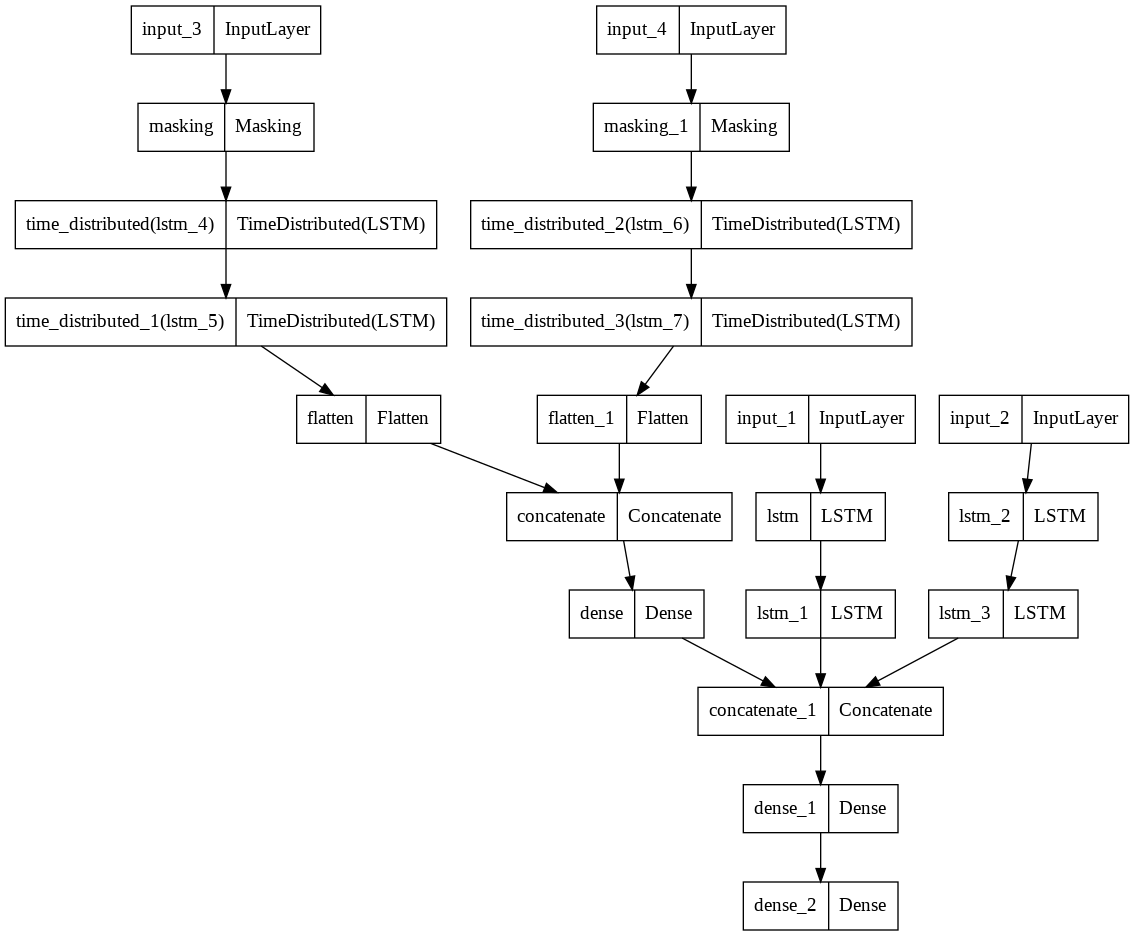

In [ ]:
tf.keras.utils.plot_model(classifier)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("./drive/MyDrive/MSc Thesis/Experiments/models/LSTM_1d_freq_exp2_exp5_local_info_v2.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)


earlystop = EarlyStopping(monitor = 'val_accuracy', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 20, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop,checkpoint]


In [ ]:
# Fitting the RNN to the Training set
history=classifier.fit([X_train_scaled,X_train_scaled_f,X_train_scaled_local,X_train_scaled_f_local], y_train[:,0], epochs = 200, batch_size = 64,validation_data=([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local],y_test[:,0]),callbacks=callbacks)


Epoch 1/200
288/288 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.6957
Epoch 1: val_accuracy improved from -inf to 0.75818, saving model to ./drive/MyDrive/MSc Thesis/Experiments/models/LSTM_1d_freq_exp2_exp5_local_info_v2.h5
288/288 [==============================] - 103s 284ms/step - loss: 0.5763 - accuracy: 0.6957 - val_loss: 0.4567 - val_accuracy: 0.7582
Epoch 2/200
288/288 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.7319
Epoch 2: val_accuracy improved from 0.75818 to 0.82609, saving model to ./drive/MyDrive/MSc Thesis/Experiments/models/LSTM_1d_freq_exp2_exp5_local_info_v2.h5
288/288 [==============================] - 76s 263ms/step - loss: 0.4941 - accuracy: 0.7319 - val_loss: 0.3302 - val_accuracy: 0.8261
Epoch 3/200
288/288 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.8071
Epoch 3: val_accuracy improved from 0.82609 to 0.84791, saving model to ./drive/MyDrive/MSc Thesis/Experiments/models/LSTM_1d_f

In [ ]:
classifier.evaluate([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local],y_test[:,0])

181/181 [==============================] - 6s 34ms/step - loss: 0.2278 - accuracy: 0.9389


[0.22778697311878204, 0.9388532638549805]

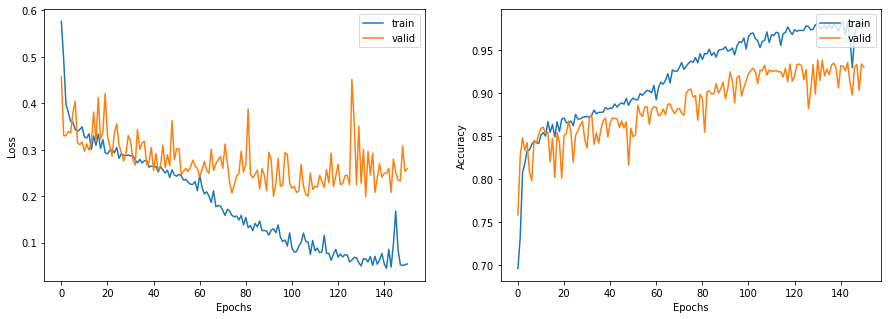

In [ ]:
import matplotlib.pyplot as plt
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "valid"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "valid"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

display_learning_curves(history)

In [ ]:
import tensorflow as tf
temp=tf.keras.models.load_model("./drive/MyDrive/MSc Thesis/Experiments/models/LSTM_1d_freq_exp2_exp5_local_info_v2.h5")

In [ ]:
temp.evaluate([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local], y_test[:,0], 1)

5773/5773 [==============================] - 198s 34ms/step - loss: 0.2278 - accuracy: 0.9389


[0.2277866005897522, 0.9388532638549805]

In [ ]:
temp.evaluate([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local], y_test[:,0])

181/181 [==============================] - 12s 35ms/step - loss: 0.2278 - accuracy: 0.9389


[0.22778697311878204, 0.9388532638549805]

In [ ]:
y_pred = temp.predict([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local])
y_pred= (y_pred>=0.5).astype(int)

In [ ]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

In [ ]:
confusion_matrix(y_test[:,0],y_pred)

array([[4147,  231],
       [ 122, 1273]])

In [ ]:
accuracy_score(y_test[:,0],y_pred)

0.9388532825220856

In [ ]:
f1_score(y_test[:,0],y_pred)

0.8782338737495688

In [ ]:
print(classification_report(y_test[:,0],y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4378
           1       0.85      0.91      0.88      1395

    accuracy                           0.94      5773
   macro avg       0.91      0.93      0.92      5773
weighted avg       0.94      0.94      0.94      5773



In [ ]:
# ###Collect F-Score 10 times
# import sklearn
# from tqdm.notebook import tqdm
# def calc_f1_score(X_train_scaled,X_train_scaled_local,X_test_scaled,X_test_scaled_local,X_train_scaled_f,X_train_scaled_f_local,X_test_scaled_f,X_test_scaled_f_local,y_train,y_test,earlystop):
#   input_1 = Input((X_train_scaled.shape[1], X_train_scaled.shape[2])) #50,8
#   input_2 = Input((X_train_scaled_f.shape[1], X_train_scaled_f.shape[2])) #26,4
#   input_3 = Input((X_train_scaled_local.shape[1], X_train_scaled_local.shape[2], X_train_scaled_local.shape[3])) #20,50,4
#   input_4 = Input((X_train_scaled_f_local.shape[1], X_train_scaled_f_local.shape[2], X_train_scaled_f_local.shape[3])) #20,26,2
#   x1=LSTM(units = 100, return_sequences = True)(input_1)
#   x1=LSTM(units = 50)(x1)
#   x2=LSTM(units = 100, return_sequences = True)(input_2)
#   x2=LSTM(units = 50)(x2)
#   x3=layers.Masking(mask_value=padding_val)(input_3)
#   x3=layers.TimeDistributed(LSTM(units = 100, return_sequences = True))(x3)
#   x3=layers.TimeDistributed(LSTM(units = 50))(x3)
#   x3=layers.Flatten()(x3)
#   x4=layers.Masking(mask_value=padding_val)(input_4)
#   x4=layers.TimeDistributed(LSTM(units = 100, return_sequences = True))(x4)
#   x4=layers.TimeDistributed(LSTM(units = 50))(x4)
#   x4=layers.Flatten()(x4)
#   x_neighbbours=layers.concatenate([x3,x4])
#   x_neighbbours=layers.Dense(100,activation='relu')(x_neighbbours)
#   x = layers.concatenate([x1, x2,x_neighbbours])
#   x=layers.Dense(50,activation='relu')(x)
#   output_layer = layers.Dense(1, activation="sigmoid")(x)
#   classifier=keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=output_layer)
#   # Compiling the RNN
#   classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#   classifier.fit([X_train_scaled,X_train_scaled_f,X_train_scaled_local,X_train_scaled_f_local], y_train[:,0], epochs = 500, batch_size = 64,validation_data=([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local],y_test[:,0]),callbacks=[earlystop])
#   y_pred = classifier.predict([X_test_scaled,X_test_scaled_f,X_test_scaled_local,X_test_scaled_f_local])
#   y_pred= (y_pred>=0.5).astype(int)
#   return(sklearn.metrics.f1_score(y_test[:,0],y_pred))

# f1_score_list=[]
# for i in tqdm(range(10)):
#   f1_score_list=f1_score_list+[calc_f1_score(X_train_scaled,X_train_scaled_local,X_test_scaled,X_test_scaled_local,X_train_scaled_f,X_train_scaled_f_local,X_test_scaled_f,X_test_scaled_f_local,y_train,y_test,earlystop)]
#   print("Number of iterations",len(f1_score_list))
#   print("F1-scores: ",f1_score_list)
#   print("Average F1-Score",np.mean(f1_score_list))
#   print("Std Dev F1-Score",np.std(f1_score_list))
#   print("Error bar F1-Score",np.std(f1_score_list)/np.sqrt(len(f1_score_list)))
